<a href="https://colab.research.google.com/github/Mrrohit0806/Capstone-project-01/blob/main/Univariant_EDA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('/content/FE_gurgaon_properties_cleaned_lev_03.csv')

In [3]:
df.head()

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m heights,sector 65,15793.0,Super Built up area 1260(117.06 sq.m.),1260.0,2,2,2,26.0,...,1260.0,NaN,NaN,0,0,0,0,0,0,48
1,flat,trisara our homes 3,sohna road,4339.0,Built Up area: 484 (44.97 sq.m.),484.0,1,1,0,2.0,...,NaN,484.0,NaN,0,0,0,0,0,0,0
2,flat,sare crescent parc,sector 92,5000.0,Super Built up area 1000(92.9 sq.m.),1000.0,2,2,3,2.0,...,1000.0,NaN,NaN,0,0,0,0,0,0,38
3,house,independent,sector 40,40135.0,Plot area 263(219.9 sq.m.),2367.0,12,12,3+,4.0,...,NaN,2367.0,NaN,0,0,1,0,0,2,57
4,flat,breez global heights,sohna road,6420.0,Super Built up area 623(57.88 sq.m.),654.0,2,2,2,2.0,...,623.0,NaN,NaN,0,0,0,0,0,0,73


In [4]:
df.shape

(3961, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3961 non-null   object 
 1   society              3960 non-null   object 
 2   sector               3961 non-null   object 
 3   price_per_sqft       3941 non-null   float64
 4   areaWithType         3961 non-null   object 
 5   area                 3941 non-null   float64
 6   bedRoom              3961 non-null   int64  
 7   bathroom             3961 non-null   int64  
 8   balcony              3961 non-null   object 
 9   floorNum             3940 non-null   float64
 10  facing               2784 non-null   object 
 11  agePossession        3961 non-null   object 
 12  Price_in_Crore       2996 non-null   float64
 13  price                945 non-null    float64
 14  super_built_up_area  915 non-null    float64
 15  built_up_area        1848 non-null   f

In [10]:
# drop price column
df.drop('price', axis=1, inplace=True)

In [11]:
df.shape

(3961, 23)

In [13]:
df.duplicated().sum()

np.int64(129)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(3832, 23)

1. **property_type**

<Axes: xlabel='property_type'>

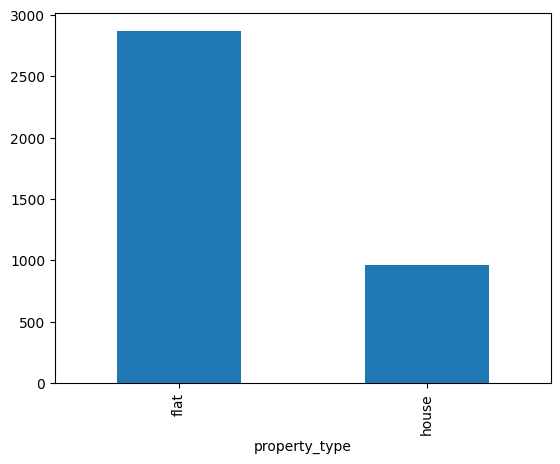

In [16]:
df['property_type'].value_counts().plot(kind='bar',)

**Observations**


*   Flats are in majority(around 65%) and there are less number of houses(~ 35%)
*   No missing values



**2.society**

In [17]:
df['society'].value_counts().shape

(725,)

In [18]:
df['society'].value_counts()

,count
society,
independent,569
tulip violet,75
ss the leaf,73
shapoorji pallonji joyville gurugram,42
dlf new town heights,42
...,...
dlf 76,1
dlf city plot phase 3,1
"m m residency, krishna colony, gurgaon",1


In [19]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

,proportion
society,
tulip violet,0.022992
ss the leaf,0.045371
shapoorji pallonji joyville gurugram,0.058246
dlf new town heights,0.071122
signature global park,0.081852
...,...
indiabulls enigma,0.479767
the close north,0.483752
umang monsoon breeze,0.487738


In [20]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(92),
 'Low (2-9)': np.int64(287),
 'Very Low (1)': np.int64(343)}

<Axes: xlabel='society'>

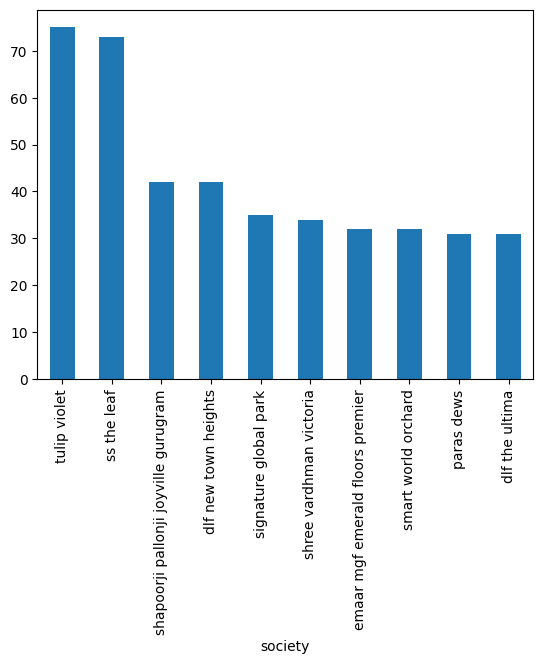

In [21]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [22]:
df['society'].isnull().sum()

np.int64(1)

In [23]:
df[df['society'].isnull()]

,property_type,society,sector,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2578,flat,NaN,sector 78,3692.0,Built Up area: 1625 (150.97 sq.m.),1625.0,2,2,0,NaN,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


**Observations**


*   Around 14.8 % properties comes under independent tag
*  There are 725 societies


*  There top 95 societies have 50 percent of the properties and the rest 50 percent of the properties come under the remaining 630 societies

   * Very High (>100): Only 1 society has more than 100 listings.
   *  High (50-100): 2 societies have between 50 to 100 listings


   *  Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
   *   Low (2-9): 287 societies have between 2 to 9 listings.


   *   Very Low (1): A significant number, 343 societies, have only 1 listing
*   1 missing value(2578 row no.)






  





**3. sector**

In [24]:
# unique sectors
df['sector'].value_counts().shape

(244,)

<Axes: xlabel='sector'>

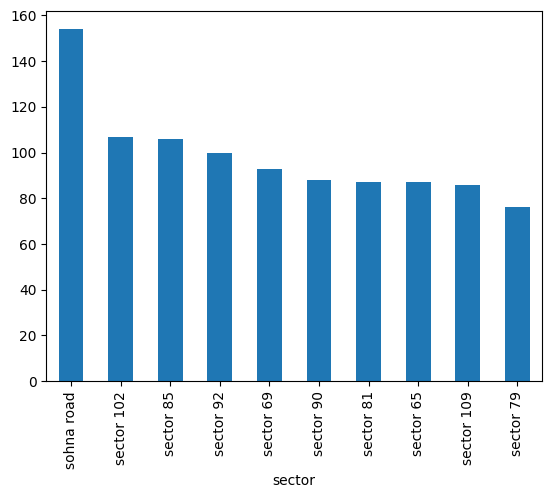

In [25]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [26]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(3),
 'High (50-100)': np.int64(24),
 'Average (10-49)': np.int64(64),
 'Low (2-9)': np.int64(69),
 'Very Low (1)': np.int64(84)}

**Observations**


*   There are a total of 244 unique sectors in the dataset.
*   Frequency distribution of sectors:


    *   Very High (>100): 3 sectors have more than 100 listings.
    *   High (50-100): 24 sectors have between 50 to 100 listings.


    *   Average (10-49): A majority, 64 sectors, fall in this range with 10 to 49 listings each.
    *   Low (2-9): 69 sectors have between 2 to 9 listings.

    *   Very Low (1): 84 sectors have very low listing










**4. Price_in_Crore**

In [29]:
df['Price_in_Crore'].isnull().sum()

np.int64(964)

In [31]:
df['Price_in_Crore'].describe()

,Price_in_Crore
count,2868.000000
mean,1.708577
std,1.387160
min,0.160000
25%,0.900000
50%,1.380000
75%,2.042500
max,15.000000


<Axes: xlabel='Price_in_Crore', ylabel='Count'>

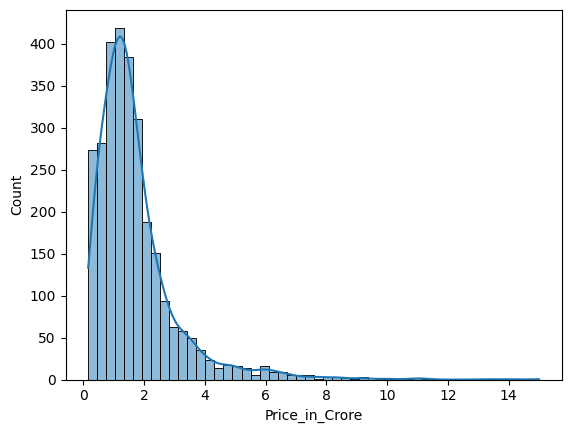

In [32]:
sns.histplot(df['Price_in_Crore'], kde=True, bins=50)

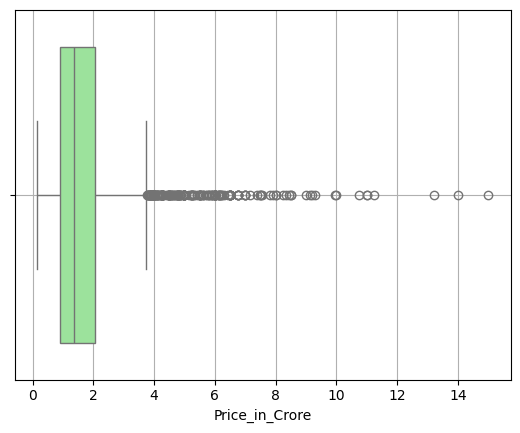

In [33]:
sns.boxplot(x=df['Price_in_Crore'], color='lightgreen')
plt.grid()



**Descriptive Statistics:**
*   Count: There are 2,868 non-missing price entries.


*   Mean Price: The average price is approximately 1.70 crores.
*   Median Price: The median  price is 1.18 crores.


*   Standard Deviation: The prices have a standard deviation of 1.38, indicating variability in the prices.
*   Range: Prices range from a minimum of 0.16 crores to a maximum of 15.0 crores.


*   IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.90 crores to 2.04 crores.

**Visualizations:**

*   Distribution: The histogram indicates that most properties are priced in the lower range (below 4 crores), with a few properties going beyond 9 crores.
*   Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

**Missing Values:** There are 964 missing values in the price column.

In [35]:
# Skewness and Kurtosis
skewness = df['Price_in_Crore'].skew()
kurtosis = df['Price_in_Crore'].kurt()

print(skewness,kurtosis)

2.8929740406700564 13.805943956978117


**Skewness**: The price distribution has a skewness of approximately 2.892, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis:** The kurtosis value is approximately 13.805. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [37]:
# Quantile Analysis
quantiles = df['Price_in_Crore'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

,Price_in_Crore
0.01,0.24
0.05,0.35
0.95,4.25
0.99,7.00



**Quantile Analysis:**


*   1% Quantile: Only 1% of properties are priced below 0.24 crores.
*   5% Quantile: 5% of properties are priced below 0.35 crores.

*   95% Quantile: 95% of properties are priced below 4.25 crores.
*   99% Quantile: 99% of properties are priced below 7.00 crores, indicating that very few properties are priced above this value.





In [38]:
# Identify potential outliers using IQR method
Q1 = df['Price_in_Crore'].describe()['25%']
Q3 = df['Price_in_Crore'].describe()['75%']
IQR = Q3 - Q1

IQR

np.float64(1.1425)

In [39]:
lower_bound = Q1 - 1.38 * IQR
upper_bound = Q3 + 1.38 * IQR

print(lower_bound, upper_bound)

-0.6766499999999999 3.61915


In [41]:
outliers = df[(df['Price_in_Crore'] < lower_bound) | (df['Price_in_Crore'] > upper_bound)]
outliers.shape

(209, 23)

In [42]:
outliers['Price_in_Crore'].describe()

,Price_in_Crore
count,209.000000
mean,5.476603
std,1.914091
min,3.630000
25%,4.100000
50%,4.950000
75%,6.150000
max,15.000000


**Outliers Analysis** (using IQR method):


*   Based on the IQR method, there are 209 properties considered as outliers.
*   These outliers have an average price of approximately 5.47 crores.

*   The range for these outliers is from 3.63 crores to 15.0 crores.






<Axes: xlabel='Price_in_Crore'>

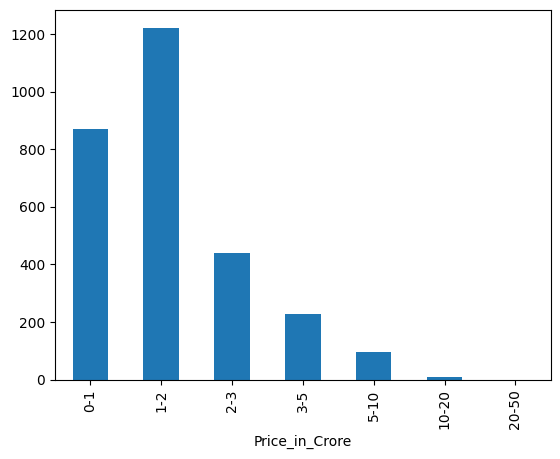

In [43]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['Price_in_Crore'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')



*   The majority of properties are priced in the "0-1 crores" and "1-2 crores" ranges.
*   There's a significant drop in the number of properties priced above "5 crores."



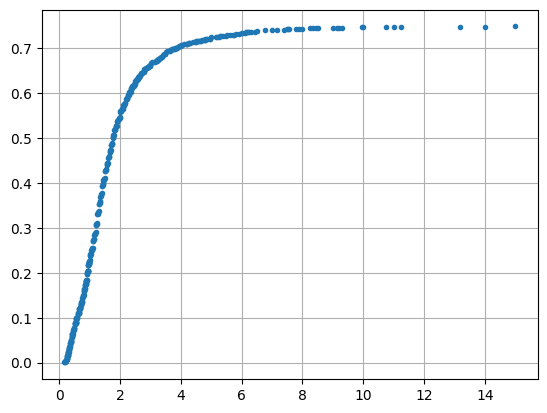

In [44]:
# ecdf plot
ecdf = df['Price_in_Crore'].value_counts().sort_index().cumsum() / len(df['Price_in_Crore'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

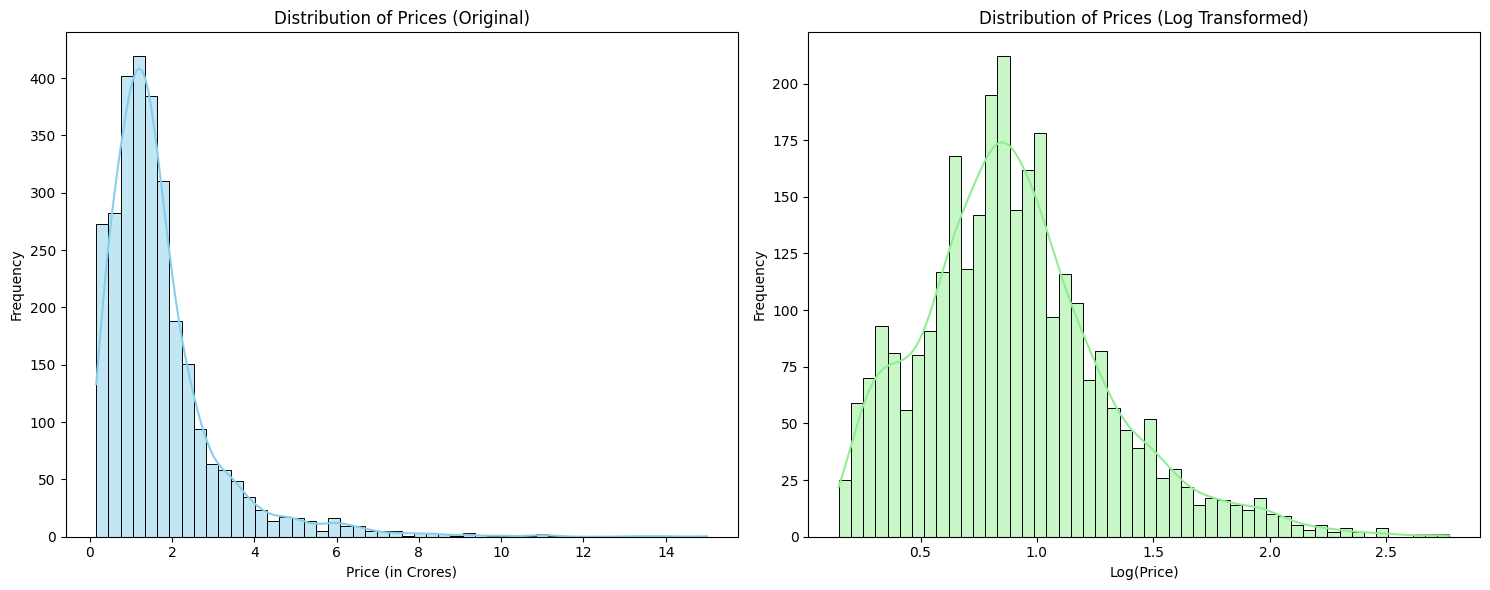

In [45]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['Price_in_Crore'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Price_in_Crore']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [46]:
skewness = np.log1p(df['Price_in_Crore']).skew()
kurtosis = np.log1p(df['Price_in_Crore']).kurt()

print(skewness,kurtosis)

0.7795716489082015 1.0442802642612201


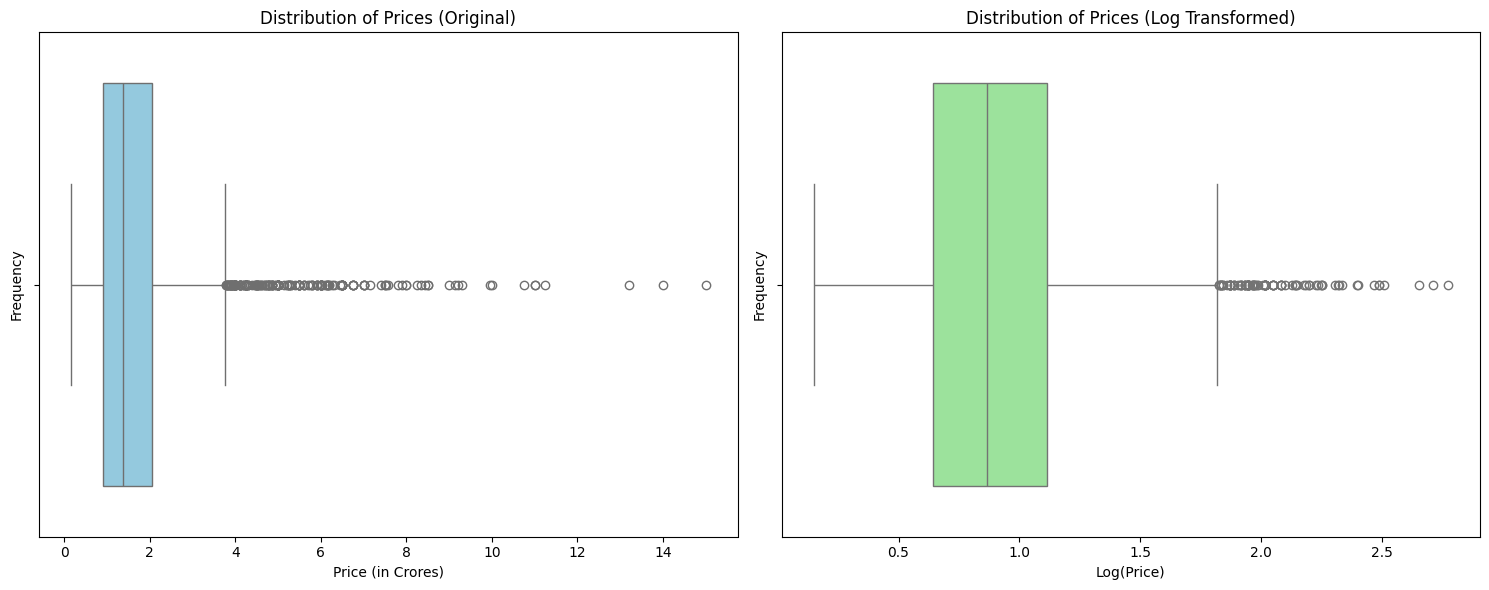

In [58]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(x = df['Price_in_Crore'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(x = np.log1p(df['Price_in_Crore']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**5. price_per_sqft**

In [59]:
df['price_per_sqft'].isnull().sum()

np.int64(19)

In [60]:
df['price_per_sqft'].describe()

,price_per_sqft
count,3813.000000
mean,14012.019145
std,23344.201645
min,2.000000
25%,6806.000000
50%,9011.000000
75%,13875.000000
max,600000.000000


<Axes: xlabel='price_per_sqft', ylabel='Count'>

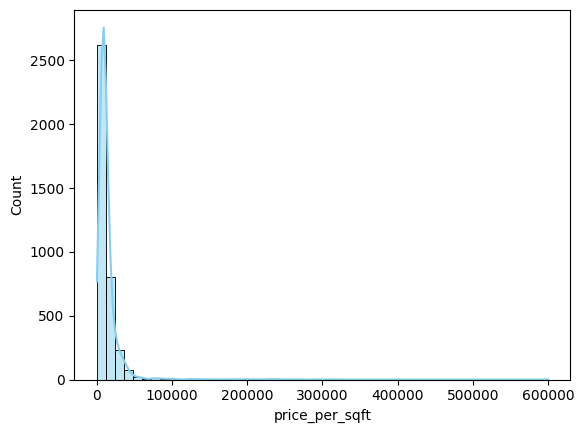

In [61]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: xlabel='price_per_sqft'>

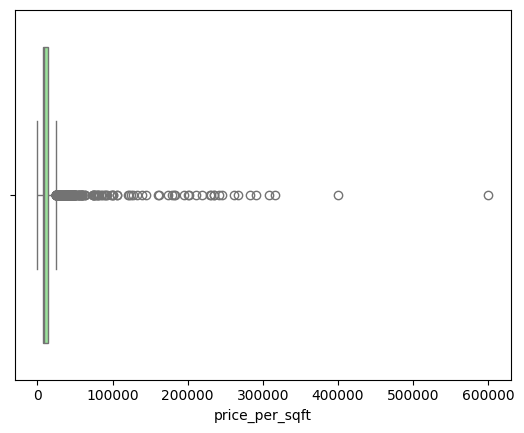

In [63]:
sns.boxplot(x = df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers.


**Observation**


*   Potential Outliers
*   Right Skewed

*   19 missing values






**6. bedRoom**

In [64]:
df['bedRoom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bedRoom'>

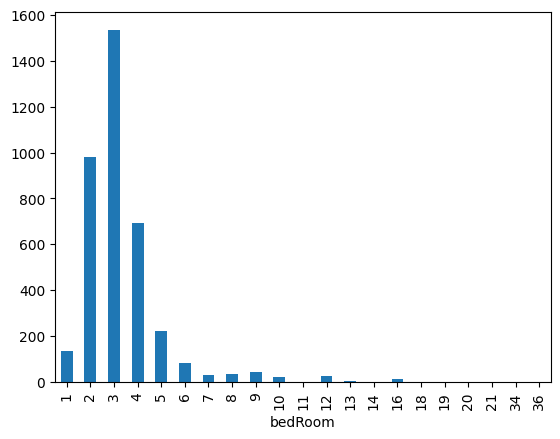

In [65]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

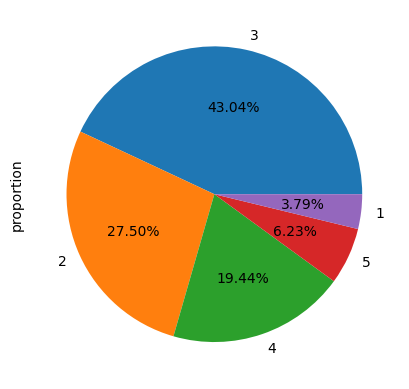

In [66]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

**7. bathroom**

In [67]:
df['bathroom'].isnull().sum()

np.int64(0)

<Axes: xlabel='bathroom'>

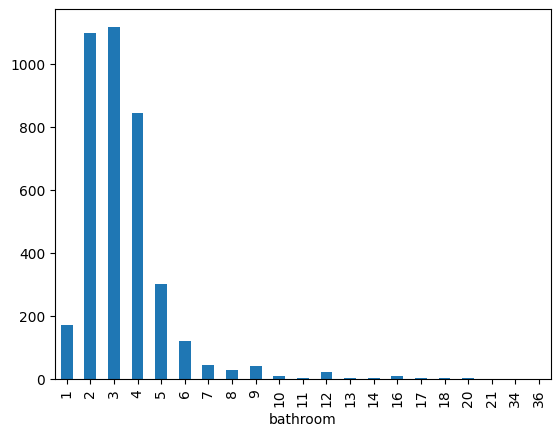

In [68]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

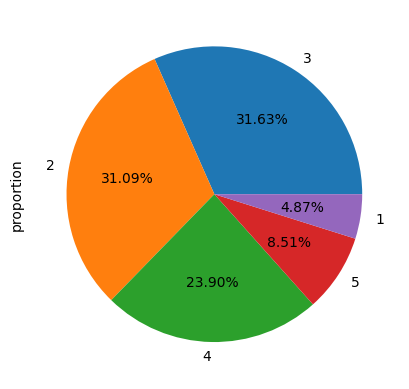

In [69]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

**8. balcony**

In [70]:
df['balcony'].isnull().sum()

np.int64(0)

<Axes: xlabel='balcony'>

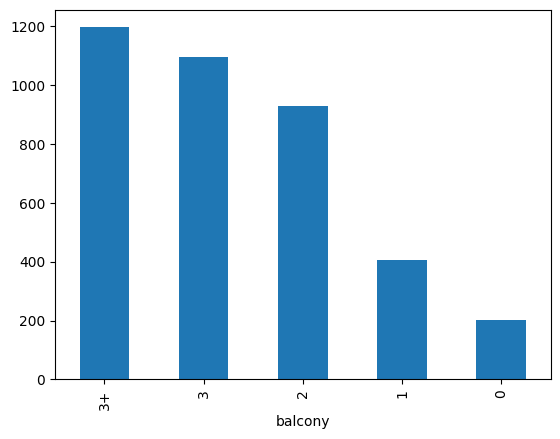

In [71]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

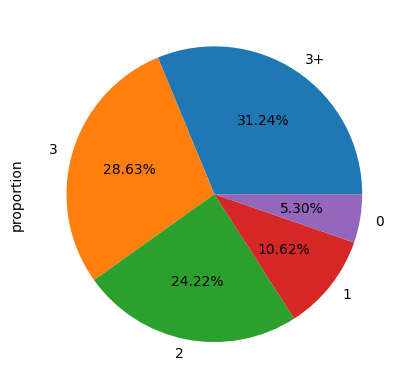

In [72]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

**9. floorNum**

In [73]:
df['floorNum'].isnull().sum()

np.int64(21)

In [74]:
df['floorNum'].describe()

,floorNum
count,3811.000000
mean,6.652847
std,5.991852
min,0.000000
25%,2.000000
50%,4.000000
75%,10.000000
max,51.000000


<Axes: xlabel='floorNum'>

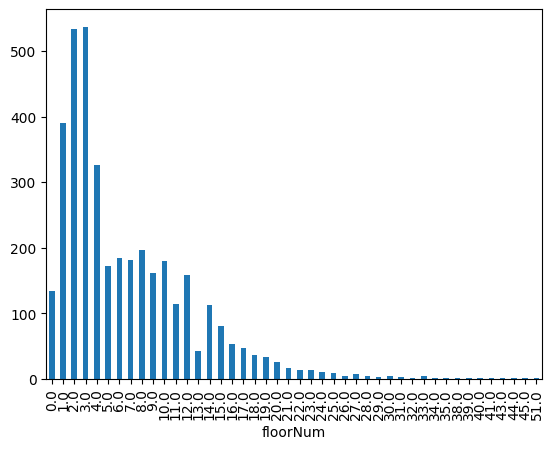

In [75]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='floorNum'>

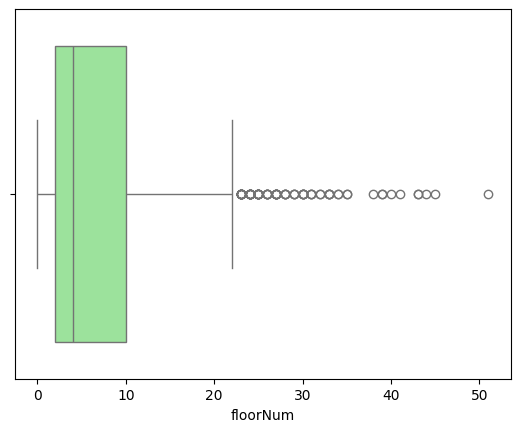

In [77]:
sns.boxplot(x = df['floorNum'], color='lightgreen')



*   The majority of the properties lie between the ground floor (0) and the 25th floor.

*   Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
*   There are a few properties located at higher floors, but their frequency is much lower.


*   he box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.

*   Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.



*   **Missing values:** 21







**10. facing**

In [86]:
df['facing'].isnull().sum()

np.int64(1177)

In [87]:
df['facing'].fillna('NA',inplace=True)

/tmp/ipython-input-3692945726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


In [88]:
df['facing'].value_counts()

,count
facing,
NA,1177
East,668
North-East,663
North,410
West,258
South,237
North-West,206
South-East,183
South-West,159


**11. agePossession**

In [89]:
df['agePossession'].isnull().sum()

np.int64(0)

In [90]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1705
New Property,647
Moderately Old,610
Undefined,359
Old Property,353
Under Construction,287


**12. areas**

In [91]:
# super built up area
df['super_built_up_area'].isnull().sum()

np.int64(3046)

In [92]:
df['super_built_up_area'].describe()

,super_built_up_area
count,915.000000
mean,1925.743257
std,816.457545
min,89.000000
25%,1423.500000
50%,1815.000000
75%,2215.000000
max,10000.000000


<Axes: xlabel='super_built_up_area', ylabel='Count'>

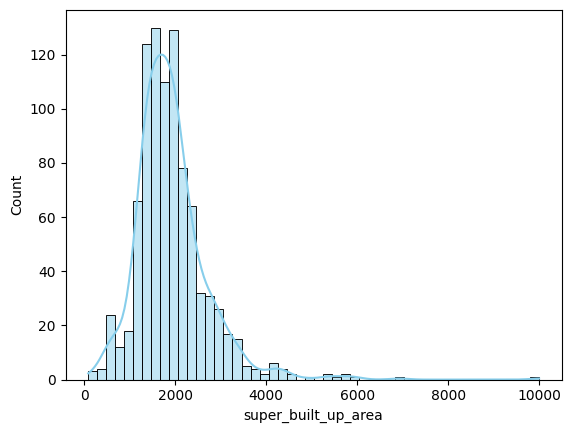

In [93]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: xlabel='super_built_up_area'>

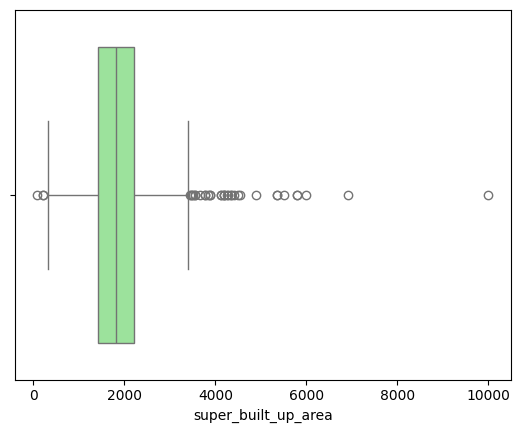

In [94]:

sns.boxplot(x = df['super_built_up_area'].dropna(), color='lightgreen')



*   Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.

*   There are a few properties with a significantly larger area, leading to a right-skewed distribution.
*   The interquartile range (IQR) lies between roughly 1,423 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.


*   There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.



*   **Mising values:** 3046





In [95]:
# built up area
df['built_up_area'].isnull().sum()

np.int64(2113)

In [96]:
df['built_up_area'].describe()

,built_up_area
count,1848.000000
mean,2306.617422
std,17174.128564
min,2.000000
25%,1000.000000
50%,1612.500000
75%,2367.000000
max,737147.000000


<Axes: xlabel='built_up_area', ylabel='Count'>

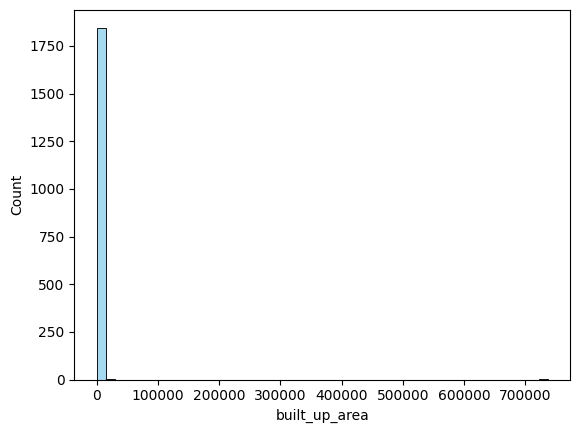

In [97]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='built_up_area'>

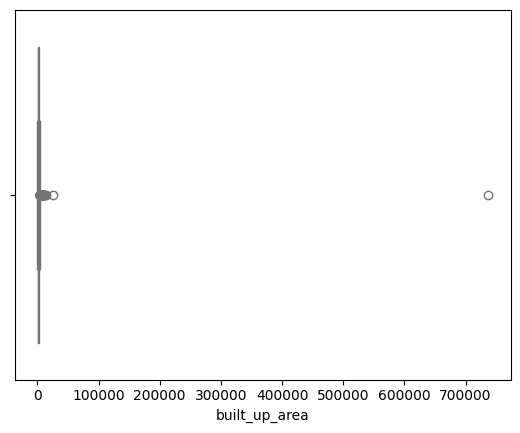

In [98]:
sns.boxplot(x = df['built_up_area'].dropna(), color='lightgreen')



*   Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
*   There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.

*   The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.



*   **Missing values:** 2113




The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.





In [99]:
# carpet area
df['carpet_area'].isnull().sum()

np.int64(1958)

In [100]:
df['carpet_area'].describe()

,carpet_area
count,2003.000000
mean,2445.275597
std,22044.807139
min,15.000000
25%,802.000000
50%,1264.000000
75%,1782.000000
max,607936.000000


<Axes: xlabel='carpet_area', ylabel='Count'>

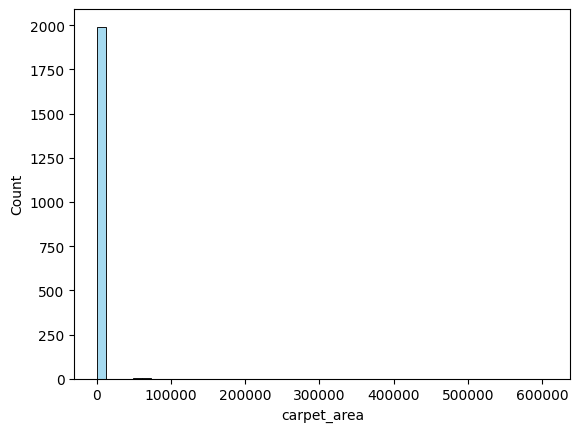

In [101]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='carpet_area'>

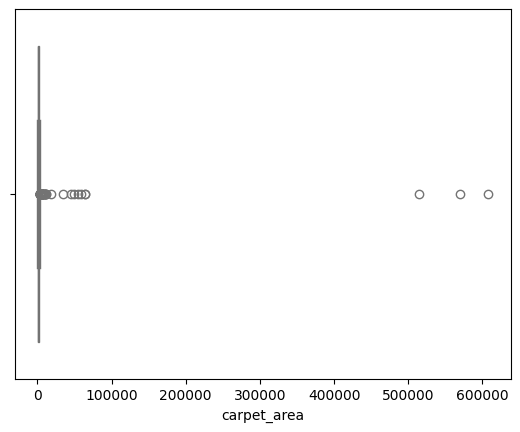

In [102]:
sns.boxplot(x = df['carpet_area'].dropna(), color='lightgreen')

**Missing values:** 1958

**13. additional rooms**

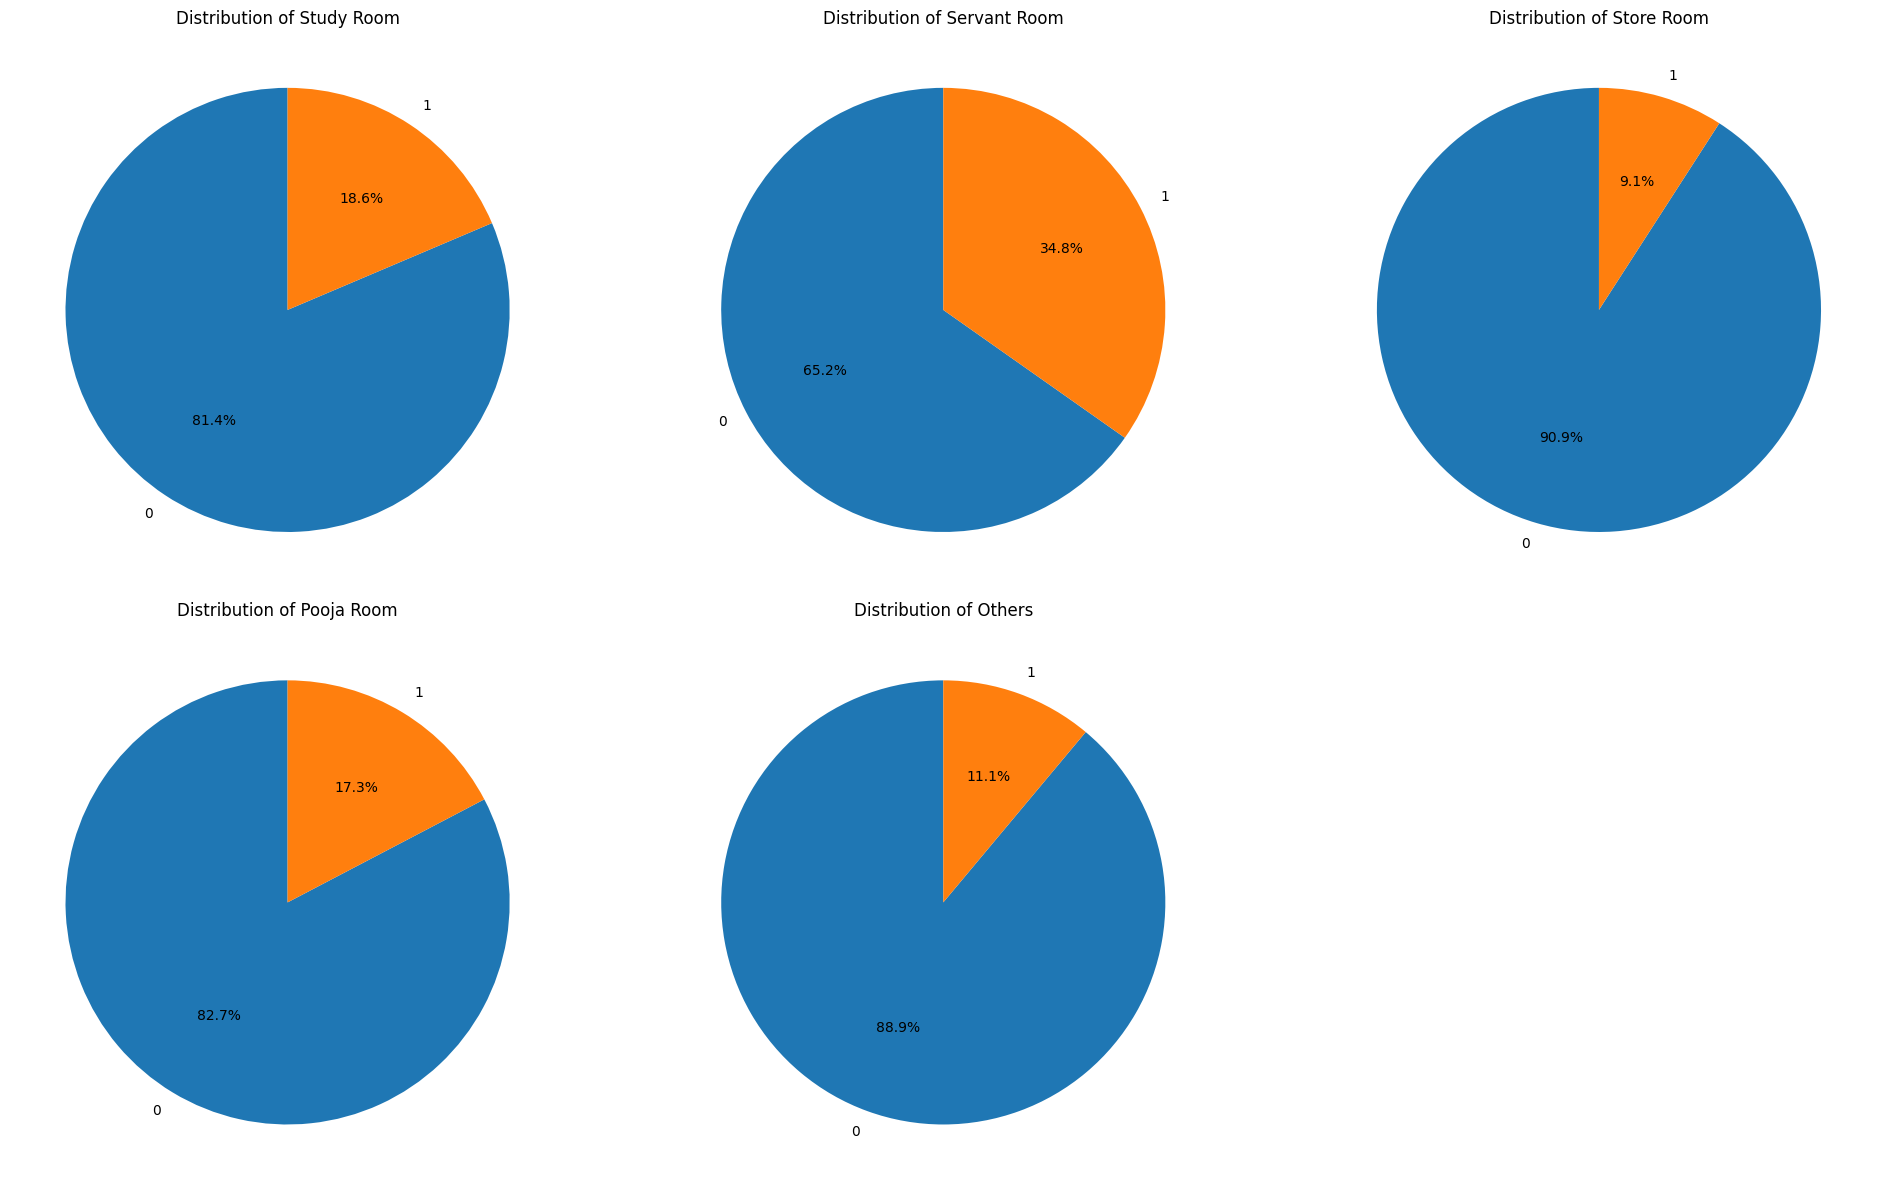

In [103]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

**14. furnishing_type**

In [104]:
df['furnishing_type'].value_counts()

,count
furnishing_type,
0,2660
2,1082
1,219


<Axes: ylabel='count'>

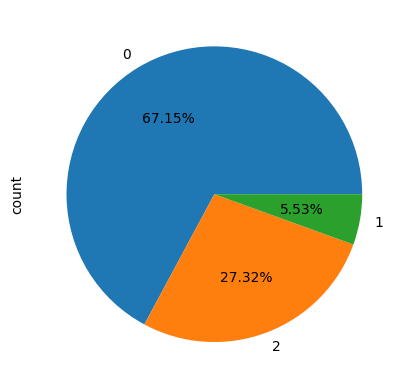

In [105]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

**15. luxury score**

In [106]:
df['luxury_score'].isnull().sum()

np.int64(0)

In [107]:
df['luxury_score'].describe()

,luxury_score
count,3961.000000
mean,69.105781
std,53.041219
min,0.000000
25%,28.000000
50%,56.000000
75%,108.000000
max,174.000000


<Axes: xlabel='luxury_score', ylabel='Count'>

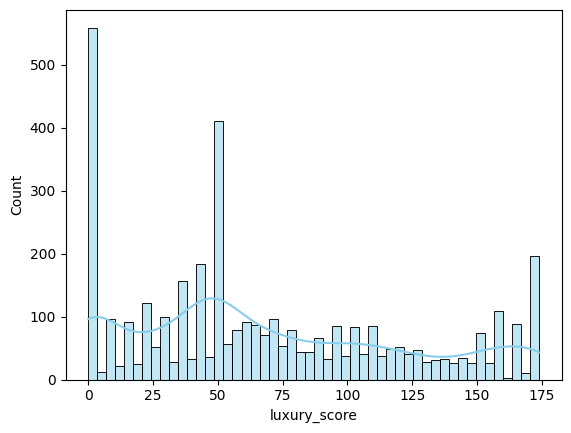

In [108]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: xlabel='luxury_score'>

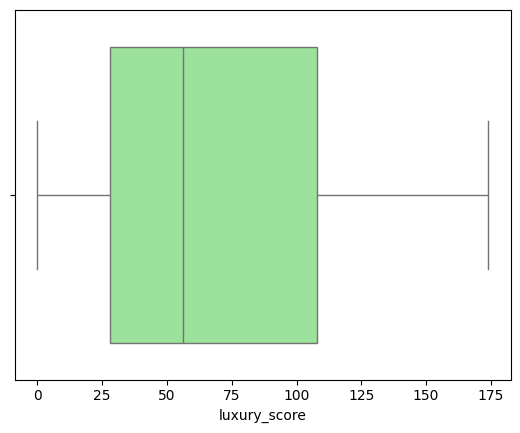

In [109]:
sns.boxplot(x = df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.